best k : 5
score : 0.9333333333333333


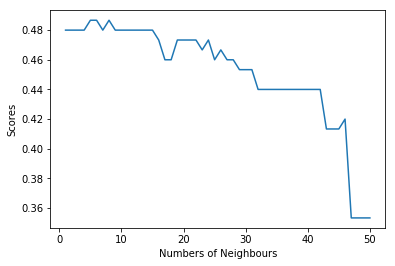

In [5]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from math import pow
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train(X, y, k):
    # train the data (X = features, y = classifer, k = number of neighbors)
    return KNeighborsClassifier(n_neighbors=k).fit(X, y)


def predict(X_test, knn):
    # predict the result
    return knn.predict(X_test)


def score(predict, y_test):
    # give out accuracy_score
    return accuracy_score(predict, y_test)


def check_correction(label, y):
    # check the correction number
    cor = 0
    incor = 0
    for i in range(0, len(label)):
        real = y[label[i][0]]
        pred = label[i][1]
        if real == pred:
            cor += 1
        else:
            incor += 1
    cor_pre = (cor)/(cor+incor)
    incor_pre = (incor)/(cor+incor)
    return cor_pre, incor_pre

def optimal_k(k, data, cv_num, classfierName):
    # get the optimal value of k which leads to the lowest error rate in n fold cross validation
    # k = number of neighbours in knn
    # cv_num = number of fold in a cross validation
    # cv = percent of each portion in the whole data
    cv = 1/cv_num
    
    # cv_split : to store the "split points"
    # score_list : to store the score (correction rate) for each k
    cv_split = []
    score_list = []
    
    # this is made to split the data
    for i in range(1, cv_num):
        cv_split.append(i * int(cv * len(data)))
    # the following is where the actual split is taking place
    train_data = np.split(data.sample(frac=1), cv_split)
    # the last column is the classifer (y) 
    test_data = train_data[cv_num-1]
    # here we like to do for loop to get the score list for knn with every integers < k 
    for j in range(1, k + 1):
        scores = 0
        for n in range(0, len(train_data) - 1):
            knn = KNeighborsClassifier(n_neighbors=j).fit(train_data[n].drop(classfierName, axis=1), train_data[n][classfierName].values)
            pred = predict(test_data.drop(classfierName, axis=1), knn)
            scores += score(pred, test_data[classfierName].values)
        score_list.append(scores/len(train_data))
    # we need to plus one because list always starts with 0 index but k starts from 1
    return score_list.index(max(score_list)) + 1, score_list

# for graph ploting
def plot_line(x, y, x_label, y_label):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

#######################################################################################
# read data
data = pd.read_csv("/Users/bill/Documents/Tutor/Kenji/source/IrisFlower/Iris", sep=",")
X = data.drop('class', axis=1)
y = data["class"].values
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k = 50
best_k, score_list = optimal_k(k, data, 2, 'class')
print("best k : " + str(best_k))
x = [i for i in range(1, k + 1)]

# train knn
handler = train(X_train, y_train, best_k)
# make prediction
predict = predict(X_test, handler)
# calculate the score (0 <= score <= 1)
score = score(predict, y_test)
print("score : " + str(score))
# plot graph score against k
plot_line(x, score_list, 'Numbers of Neighbours', 'Scores')

#######################################################################################